# Coordinates

## Sample Locations

In [32]:
#read shapefile
vec_loc20 = gpd.read_file(paths[0] + 'soil_sample//final_quarters.shp')

#get center location for quarter polygons
vec_center_loc20 = vec_loc20.centroid

#turn shapely geometry into list of points
list_loc20_center = [(x.y , x.x) for x in vec_center_loc20]

## Ried Cell Coordinates

In [33]:
#read shapefile
vec_ried = gpd.read_file(paths[0] + 'soil_sample//gpd_point.shp')

#turn shapely geometry into list of points
list_ried_center = [(x.y , x.x) for x in vec_ried.geometry]

## All Coordinates

In [ ]:
df_sm = xr_model_data.isel({'time' : 1}).to_dataframe()
coords_AOI = [(x[0],x[1]) for x in df_sm.index]

# Datasets 

In [5]:
#Soil Moisture SMAP_SP_L2 m³/m³ product
xr_model_data = xr.open_dataset(paths[1] + 'soil_moisture_1km.nc')

## Sample Dataset

#### Soil Moisture time series data -resample & interpolate daily data -  Sample data

In [34]:
sm_sample_values = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().dropna('time').to_series().droplevel(level=0).sort_index() for p in range(0,len(list_loc20_center))]
#resample to daily data points and interpolate to fill nan values
sm_sample_values_resample_1 = [x.resample('1D').interpolate(method='linear') for x in sm_sample_values]
sm_sample_values_resample_3 = [x.resample('3D').interpolate(method='linear') for x in sm_sample_values]
sm_sample_values_resample_6 = [x.resample('6D').interpolate(method='linear') for x in sm_sample_values]
sm_sample_values_resample_1_6 = [sm_sample_values_resample_1, sm_sample_values_resample_3, sm_sample_values_resample_6]

#### Soil Moisture time series data -resample & interpolate daily data -  Ried Data

In [35]:
sm_sample_values_ried = [xr_model_data.sel(latitude=list_ried_center[p][0], longitude=list_ried_center[p][1]).to_array().dropna('time').to_series().droplevel(level=0).sort_index() for p in range(0,len(list_ried_center))]
#resample to daily data points and interpolate to fill nan values
sm_sample_values_resample_1_ried = [x.resample('1D').interpolate(method='linear') for x in sm_sample_values_ried]
sm_sample_values_resample_3_ried = [x.resample('3D').interpolate(method='linear') for x in sm_sample_values_ried]
sm_sample_values_resample_6_ried = [x.resample('6D').interpolate(method='linear') for x in sm_sample_values_ried]
sm_sample_values_resample_15_ried = [x.resample('15D').interpolate(method='linear') for x in sm_sample_values_ried]
sm_sample_values_resample_30_ried = [x.resample('30D').interpolate(method='linear') for x in sm_sample_values_ried]

sm_sample_values_resample_1_6_ried = [sm_sample_values_resample_1_ried, sm_sample_values_resample_3_ried, sm_sample_values_resample_6_ried, sm_sample_values_resample_15_ried, sm_sample_values_resample_30_ried]

#### Soil Moisture time series data -resample & interpolate daily data -  AOI data

In [36]:
sm_sample_values_AOI = [xr_model_data.sel(latitude=coords_AOI[p][0], longitude=coords_AOI[p][1]).to_array().dropna('time').to_series().droplevel(level=0).sort_index() for p in range(0,len(coords_AOI))]
#resample to daily data points and interpolate to fill nan values
sm_sample_values_res_int_7D_AOI = [x.resample('7D').interpolate(method='linear') for x in sm_sample_values_AOI]


### Soil Moisture time series - rolling window

In [ ]:
sm_sample_rolling_3 = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().rolling(time=3, center=True).mean().dropna('time').to_series().droplevel(level=0) for p in range(0,len(list_loc20_center))]

### Mean Seasonal soil moisture values - mean, min, max 

In [37]:
sm_sample_season_mean = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.season').mean('time').to_series().droplevel(level=0).reindex(index=['DJF', 'MAM', 'JJA', 'SON']) for p in range(0,len(list_loc20_center))]
sm_sample_season_min = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.season').min('time').to_series().droplevel(level=0).reindex(index=['DJF', 'MAM', 'JJA', 'SON']) for p in range(0,len(list_loc20_center))]
sm_sample_season_max = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.season').max('time').to_series().droplevel(level=0).reindex(index=['DJF', 'MAM', 'JJA', 'SON']) for p in range(0,len(list_loc20_center))]
sm_sample_season = [sm_sample_season_mean,sm_sample_season_min,sm_sample_season_max]

### Mean Monthly soil moisture values - mean, min, max 

In [38]:
sm_sample_monthly_mean = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.month').mean('time').to_series().droplevel(level=0) for p in range(0,len(list_loc20_center))]
sm_sample_monthly_min = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.month').min('time').to_series().droplevel(level=0) for p in range(0,len(list_loc20_center))]
sm_sample_monthly_max = [xr_model_data.sel(latitude=list_loc20_center[p][0], longitude=list_loc20_center[p][1]).to_array().groupby('time.month').max('time').to_series().droplevel(level=0) for p in range(0,len(list_loc20_center))]
sm_sample_monthly = [sm_sample_monthly_mean,sm_sample_monthly_min,sm_sample_monthly_max]

In [39]:
to_cluster_sample = list(itertools.chain.from_iterable([[sm_sample_values],sm_sample_season, sm_sample_monthly]))

### Same Preprocessing for all time series within the ried

In [40]:
soil_moisutre_rsm = [xr_model_data.sel(latitude=list_ried_center[p][0], longitude=list_ried_center[p][1]).to_array().groupby('time.season').mean('time').to_series().droplevel(level=0) for p in range(0,len(list_ried_center))]

# The Matrix Porfile

https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

## Visualizing 

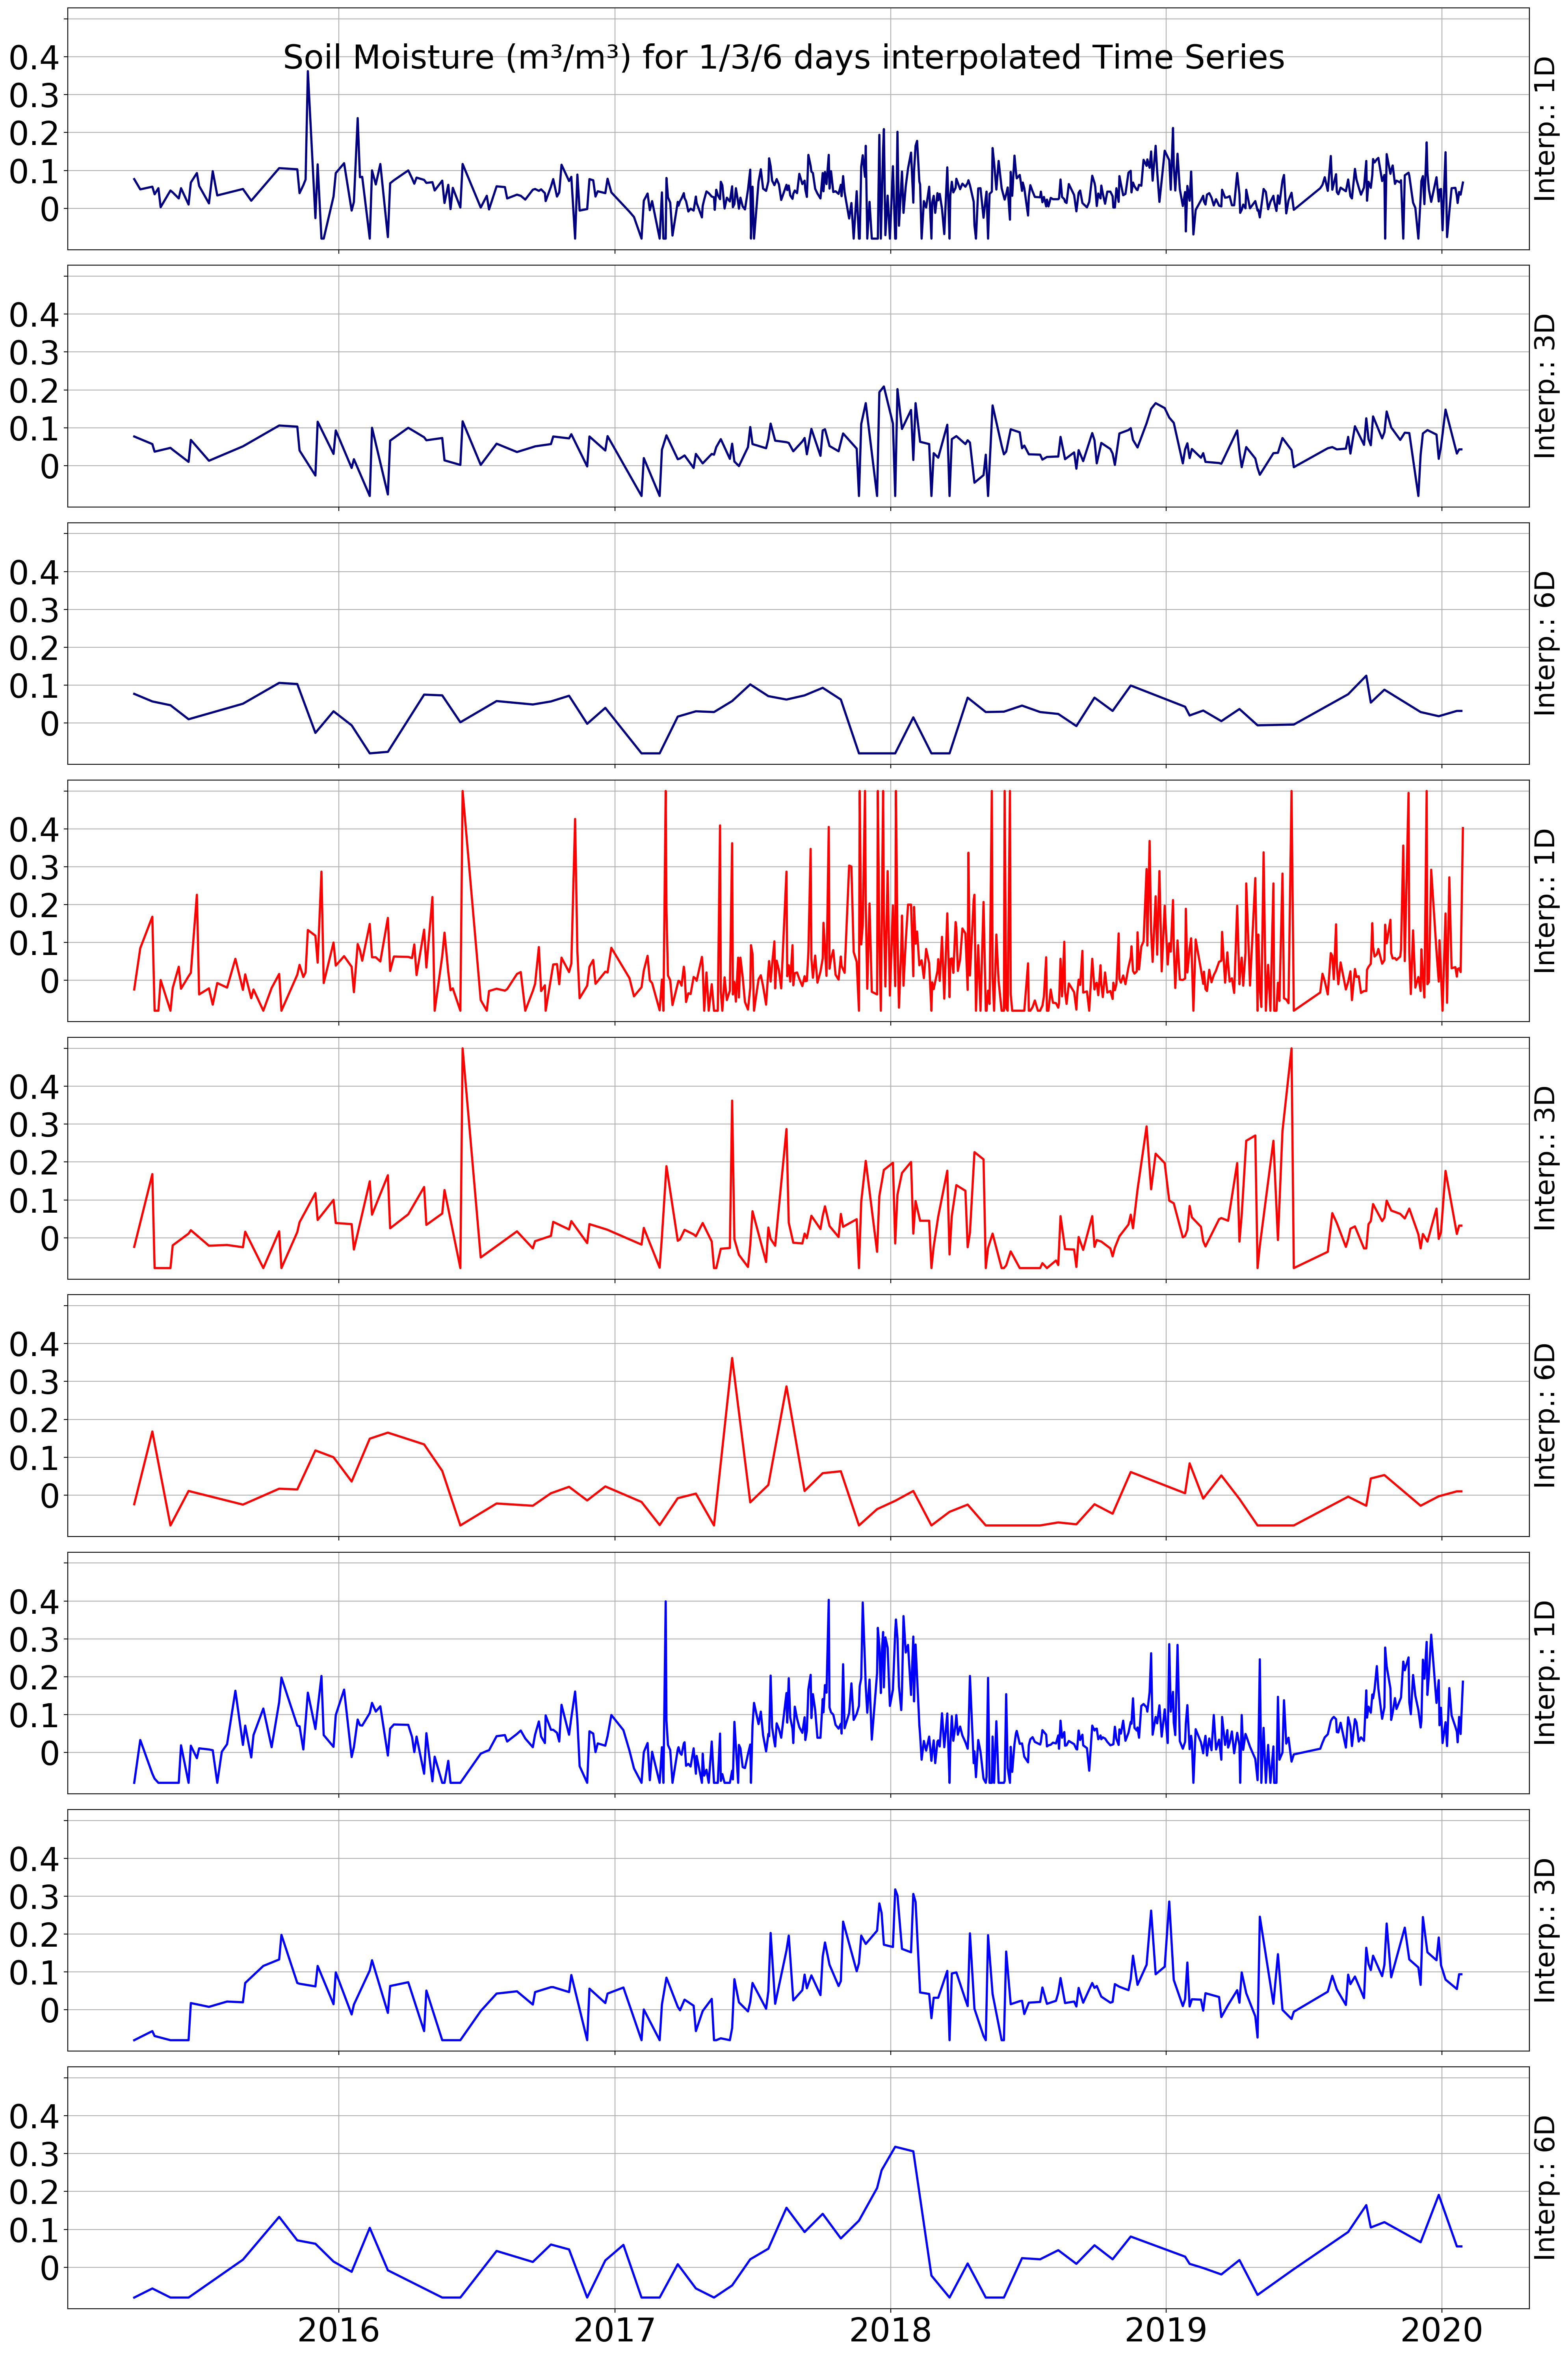

In [41]:
#visualize dataset
#figures & axes objects
fig, axs = plt.subplots(nrows=9, sharey=True, figsize=(20,30), dpi=200, sharex=True) #, gridspec_kw={'hspace': 0}

#plotting data on several axes, linwidth & color
plot_1 = [axs[x].plot(sm_sample_values_resample_1_6[y][0], linewidth=2, color='navy' ) for x,y  in zip(range(0,3), range(0,3))]
plot_2 = [axs[x].plot(sm_sample_values_resample_1_6[y][5], linewidth=2, color='red' )for x,y in zip(range(3,6), range(0,3))]
plot_3 = [axs[x].plot(sm_sample_values_resample_1_6[y][10], linewidth=2, color='blue' )for x,y in zip(range(6,9), range(0,3))]

#set axes properties (Grid & ticks & fontsize )
[x.grid(True) for x in axs];
[x.yaxis.set(ticks=[.1,.2,.3,.4,.5,.6,],ticklabels=[0,0.1,0.2,0.3,0.4,]) for x in axs];
[x.tick_params(axis='both', labelsize=30) for x in axs];

#create secondary y axis & set properties(ticks, label, size)
secaxy = [axs[x].secondary_yaxis('right') for x in range(0,9)]
[(x.set_ticks([]), x.set_ylabel('Interp.: ' + str(y) + 'D', size=25)) for x,y in zip(secaxy, [1,3,6,1,3,6,1,3,6])];


fig.subplots_adjust(hspace=0) 
fig.suptitle('Soil Moisture (m³/m³) for 1/3/6 days interpolated Time Series', fontsize='30');
fig.tight_layout()
plt.savefig(paths[5] + 'sm_time_series_interpolated_1_6.jpg')

### minimum distance samples vs squence length - Random Sample

matrix profile = nearest neighbor distance  
matrix profile index = the index to each nearest neighbor within the time series  
the output of stump is an array that contains all of the matrix profile values (i.e., z-normalized Euclidean distance to your nearest neighbor) and matrix profile indices in the first and second columns

In [43]:
x = [3,6,9,12,15,20,25,30,60,120,180]
y_1 = [stumpy.stump(sm_sample_values_resample_1_6[0][0], m) for m in x]
y_3 = [stumpy.stump(sm_sample_values_resample_1_6[1][0], m) for m in x]
y_6 = [stumpy.stump(sm_sample_values_resample_1_6[2][0], m) for m in x]
len_vector = pd.DataFrame({'1D Interp' : [len(y_1[x]) for x in range(0,11)], '3D Interp' : [len(y_3[x]) for x in range(0,11)], '6D Interp' : [len(y_6[x]) for x in range(0,11)]}, index=x)

### Length of Matrix-Profile Array with increasing seuquence length (m)

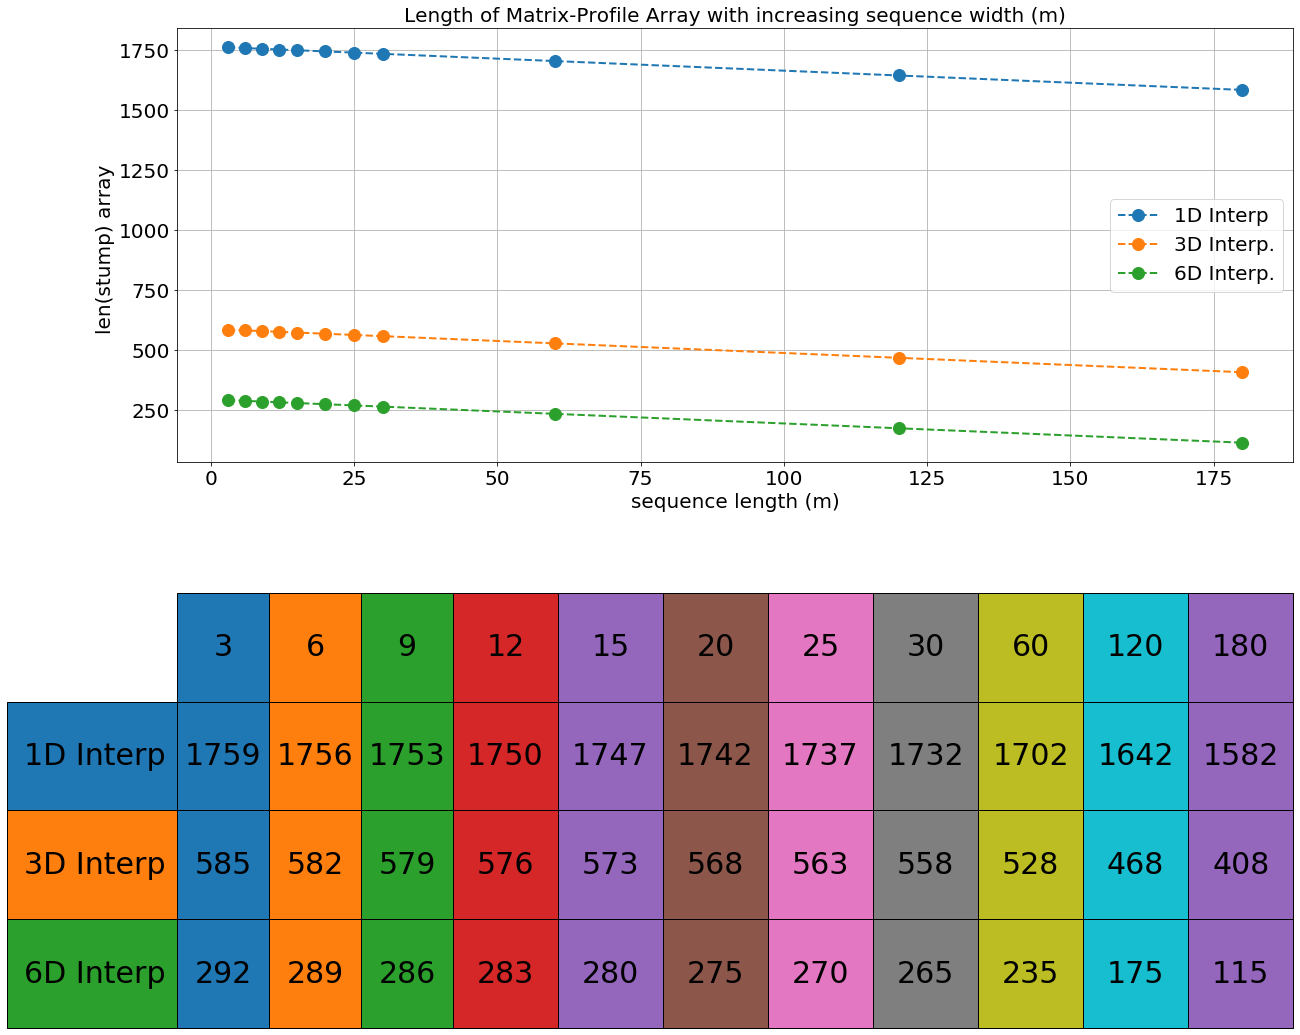

In [44]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(len_vector,  marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('Length of Matrix-Profile Array with increasing sequence width (m)', fontsize='20')
plt.setp(ax.get_xticklabels(),  fontsize=20)
plt.setp(ax.get_yticklabels(),  fontsize=20)
ax.grid(True)
ax.legend(['1D Interp','3D Interp.','6D Interp.'], fontsize=20)
ax.set(ylabel='len(stump) array ', xlabel='sequence length (m)')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
table = pd.plotting.table(ax, len_vector.transpose(), rowColours=cycle[0:3], cellColours=n, colColours=n[0], bbox=[0.0, -1.3, 1.0, 1.0], cellLoc='center',) #, , colWidths=[.1]*11fontsize=20
table.set_fontsize(30)
table.auto_set_column_width(col=list(range(len(len_vector.columns)))) # Provide integer list of columns to adjust
plt.savefig(paths[5] + 'Matrix_profile_array_length.jpg', bbox_inches="tight" )

In [45]:
#z-normal euclidean distances for different m and 1d,3d,6d interp. 
y1_v1_min = [x[:,0].min() for x in y_1]
y3_v1_min = [x[:,0].min() for x in y_3]
y6_v1_min = [x[:,0].min() for x in y_6]

y1_v1_mean = [x[:,0].min() for x in y_1]
distance_min = pd.DataFrame({'y1_v1_min' : y1_v1_min, 'y3_v1_min' : y3_v1_min, 'y6_v1_min' : y6_v1_min}, index=x)

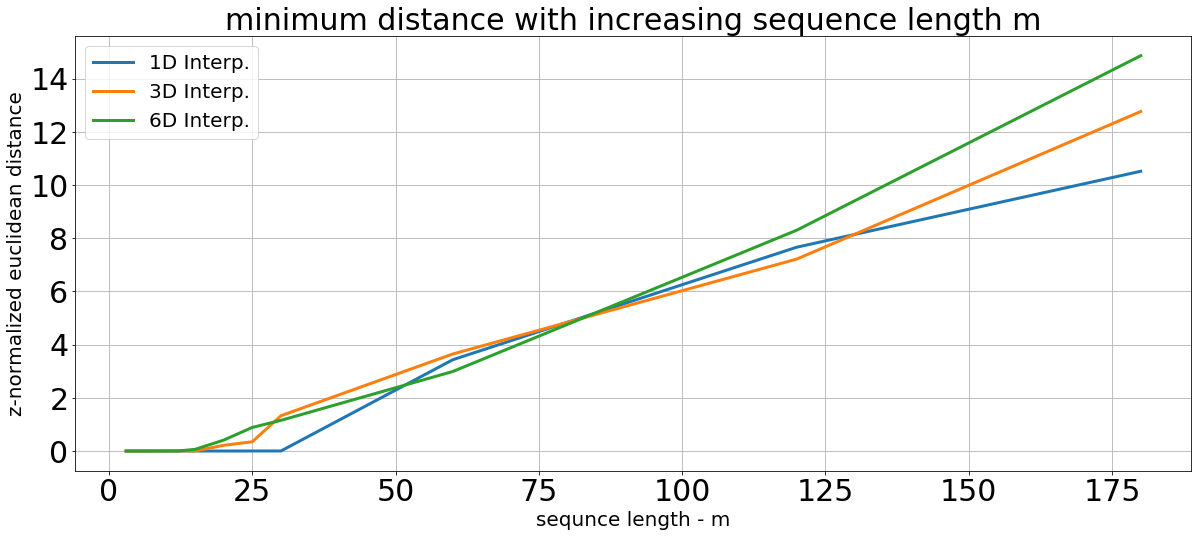

In [46]:
#plot 
fig, ax = plt.subplots(figsize=(20,8))
distance_min.plot(grid=True, fontsize=30, ax=ax, linewidth=3)
ax.legend(['1D Interp.', '3D Interp.', '6D Interp.'], fontsize=20)
ax.set_xlabel('sequnce length - m', fontsize=20)
ax.set_ylabel('z-normalized euclidean distance', fontsize=20)
plt.title('minimum distance with increasing sequence length m', fontsize='30');
plt.savefig(paths[5] + 'minimum_distance_with_increasing_sequence_length.jpg', bbox_inches="tight" )

### Mean minimum distance samples vs squence length - All Samples

In [47]:
y1_ = pd.DataFrame({'v1' : [], 'm' : 0, 'p' :0})
y3_ = pd.DataFrame({'v1' : [], 'm' : 0, 'p' :0})
y6_ = pd.DataFrame({'v1' : [], 'm' : 0, 'p' :0})

indexes = [list(range(x,y)) for x,y in zip(range(0,220,11),range(11,221, 11))]
p = 0
for sample, index in zip(sm_sample_values_resample_1_6[0],indexes):
    p = p + 1
    for m,i in zip(x,index):
        y1_.loc[i] = [np.min([stumpy.stump(sample, m)[:,0]]), m, p]
        
p = 0
for sample, index in zip(sm_sample_values_resample_1_6[1],indexes):
    p = p + 1
    for m,i in zip(x,index):
        y3_.loc[i] = [np.min([stumpy.stump(sample, m)[:,0]]), m, p]

p = 0
for sample, index in zip(sm_sample_values_resample_1_6[2],indexes):
    p = p + 1
    for m,i in zip(x,index):
        y6_.loc[i] = [np.min([stumpy.stump(sample, m)[:,0]]), m, p]

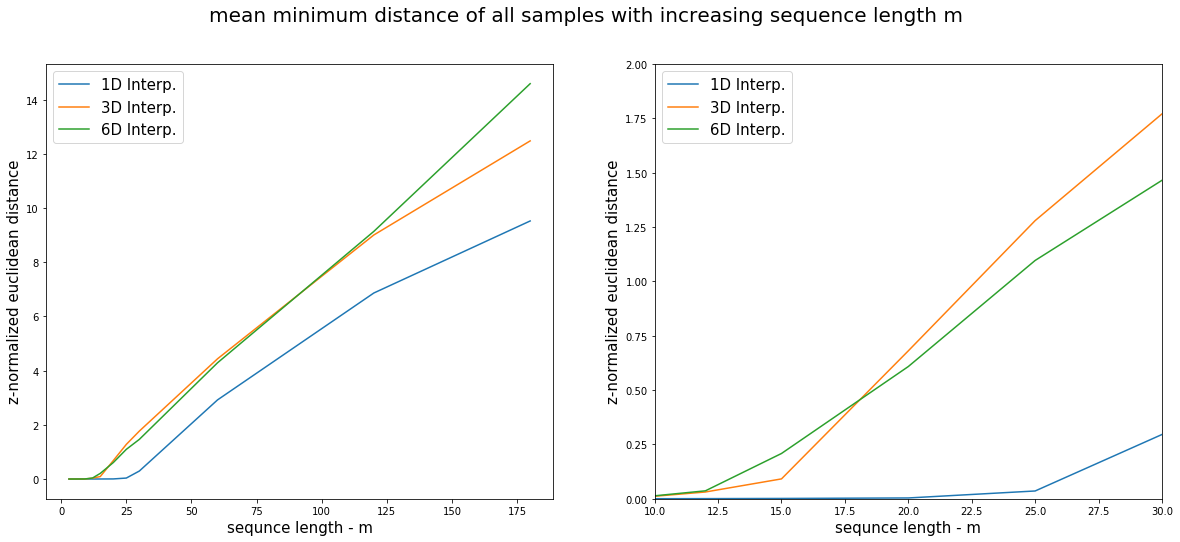

In [48]:
#groupby p
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
y1_.groupby(['m']).mean()['v1'].plot(ax=ax[0])
y3_.groupby(['m']).mean()['v1'].plot(ax=ax[0])
y6_.groupby(['m']).mean()['v1'].plot(ax=ax[0])
y1_.groupby(['m']).mean()['v1'].plot(ax=ax[1])
y3_.groupby(['m']).mean()['v1'].plot(ax=ax[1])
y6_.groupby(['m']).mean()['v1'].plot(ax=ax[1])
fig.suptitle('mean minimum distance of all samples with increasing sequence length m', fontsize='20')
ax[0].legend(['1D Interp.', '3D Interp.', '6D Interp.'], fontsize=15)
ax[1].legend(['1D Interp.', '3D Interp.', '6D Interp.'], fontsize=15)
ax[0].set_xlabel('sequnce length - m', fontsize=15)
ax[0].set_ylabel('z-normalized euclidean distance', fontsize=15)
ax[1].set_xlabel('sequnce length - m', fontsize=15)
ax[1].set_ylabel('z-normalized euclidean distance', fontsize=15)
ax[1].set_xlim(10, 30)
ax[1].set_ylim(0, 2);
plt.savefig(paths[5] + 'Mean_minimum_distance_samples_vs_squence_m.jpg', bbox_inches="tight" )

## Stump - Matrix Profile 

### Find a Motif Using STUMP
What we learn is that the global minima (vertical dashed lines) from the matrix profile correspond to the locations of the two subsequences that make up the motif pair! And the exact z-normalized Euclidean distance between these two subsequences is

In [49]:
m = 20
mp = np.array(stumpy.stump(sm_sample_values_resample_1_6[0][0], m))
mp_sort = mp[mp[:,0].argsort()]
mp_sort[:,1]

array([173, 1552, 171, ..., 1067, 978, 979], dtype=object)

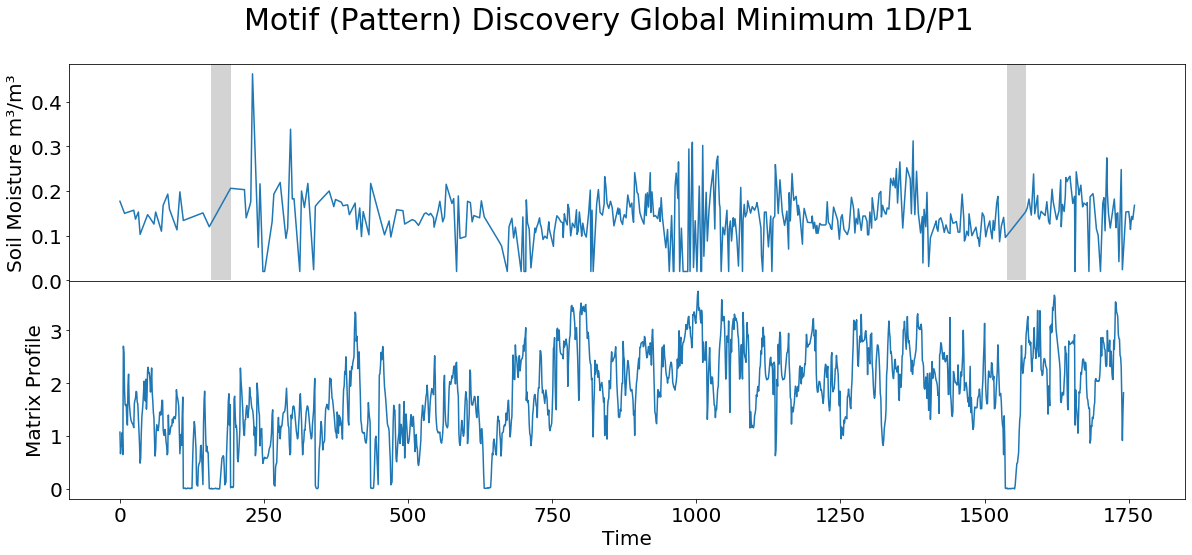

In [50]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20,8))
plt.suptitle('Motif (Pattern) Discovery Global Minimum 1D/P1', fontsize='30')

axs[0].plot(sm_sample_values_resample_1_6[0][0].values)
axs[0].set_ylabel('Soil Moisture m³/m³', fontsize='20')
axs[0].tick_params( labelsize=20)
[axs[0].add_patch(Rectangle((x, 0),m,1, facecolor='lightgrey')) for x in mp_sort[:,1][0:10]]

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp[:, 0])
#axs[1].set(ylim=[0,.03])
axs[1].tick_params( labelsize=20)
plt.savefig(paths[5] + 'Global_minimum_pattern_disc_1dp1.jpg', bbox_inches="tight" )

### Find Anomalies using STUMP

In [51]:
# sequences lengths
m_1 = 9
m_3 = 6
m_6 = 3

#Matrix Profiles for random sample
rsample = 0
mp_1 = stumpy.stump(sm_sample_values_resample_1_6[0][rsample], m_1)
mp_3 = stumpy.stump(sm_sample_values_resample_1_6[1][rsample], m_3)
mp_6 = stumpy.stump(sm_sample_values_resample_1_6[2][rsample], m_6)

The matrix profile index also tells us which subsequence within the time series does not have nearest neighbor that resembles itself

In [52]:
#sort after first(0) column (values)
mp_1_sort = mp_1[mp_1[:,0].argsort()]
mp_3_sort = mp_3[mp_3[:,0].argsort()]
mp_6_sort = mp_6[mp_6[:,0].argsort()]

#second column is index of values
mp_1_local_max_5 = mp_1_sort[:,1][-5:]
mp_1_local_min_5 = mp_1_sort[:,1][:5]

mp_3_local_max_5 = mp_3_sort[:,1][-5:]
mp_3_local_min_5 = mp_3_sort[:,1][:5]

mp_6_local_max_5 = mp_6_sort[:,1][-5:]
mp_6_local_min_5 = mp_6_sort[:,1][:5]

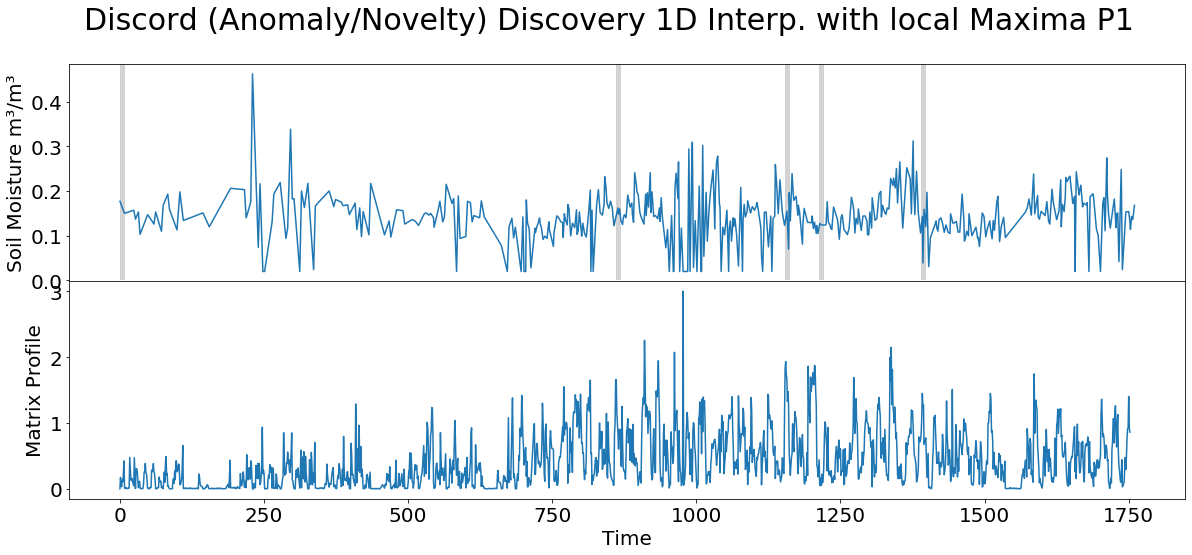

In [53]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20,8))
plt.suptitle('Discord (Anomaly/Novelty) Discovery 1D Interp. with local Maxima P1', fontsize='30')

axs[0].plot(sm_sample_values_resample_1_6[0][rsample].values)
axs[0].set_ylabel('Soil Moisture m³/m³', fontsize='20')
axs[0].tick_params( labelsize=20)
[axs[0].add_patch(Rectangle((x, 0),m_1,1, facecolor='lightgrey')) for x in mp_1_local_max_5]

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp_1[:, 0])
axs[1].tick_params(labelsize=20)
plt.savefig(paths[5] + 'local_max_Discord_disc_1dp1.jpg', bbox_inches="tight" )

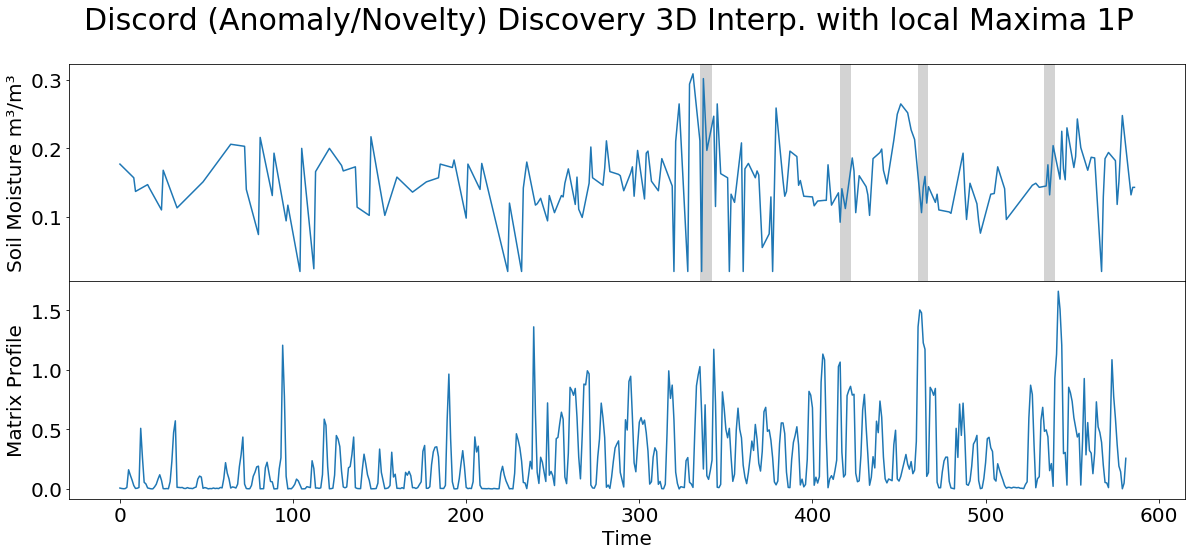

In [54]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20,8))
plt.suptitle('Discord (Anomaly/Novelty) Discovery 3D Interp. with local Maxima 1P', fontsize='30')

axs[0].plot(sm_sample_values_resample_1_6[1][0].values)
axs[0].set_ylabel('Soil Moisture m³/m³', fontsize='20')
[axs[0].add_patch(Rectangle((x, 0),m_3,40, fill=True, facecolor='lightgrey')) for x in mp_3_local_max_5]
axs[0].tick_params( labelsize=20)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp_3[:, 0])
axs[1].tick_params( labelsize=20)
plt.savefig(paths[5] + 'local_max_Discord_disc_3dp1.jpg', bbox_inches="tight" )

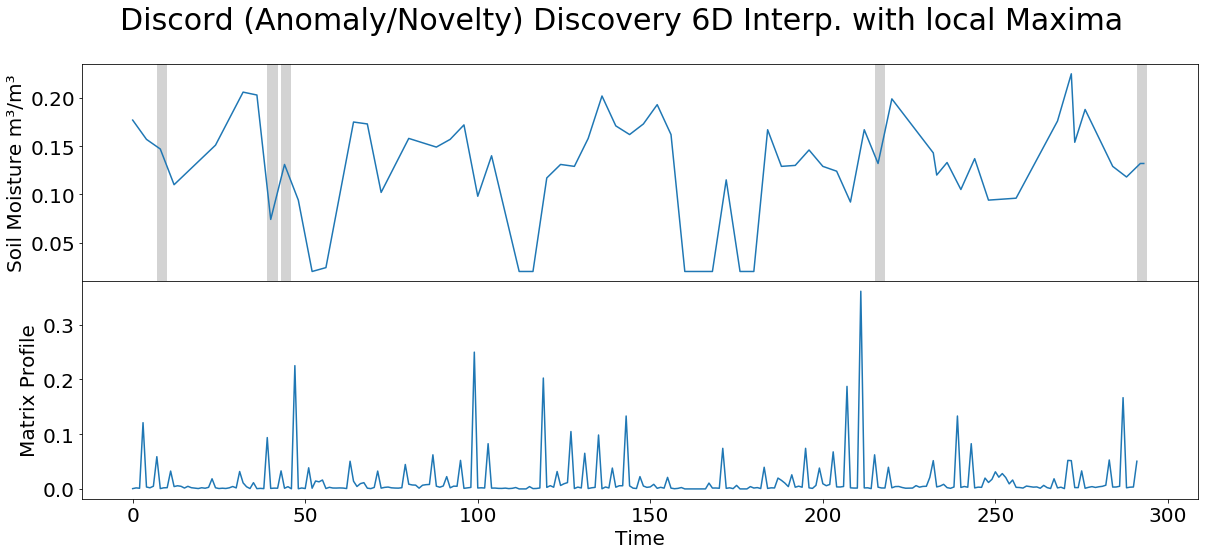

In [55]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20,8))
plt.suptitle('Discord (Anomaly/Novelty) Discovery 6D Interp. with local Maxima', fontsize='30')

axs[0].plot(sm_sample_values_resample_1_6[2][0].values)
axs[0].set_ylabel('Soil Moisture m³/m³', fontsize='20')
[axs[0].add_patch(Rectangle((x, 0),m_6,1, fill=True, facecolor='lightgrey')) for x in mp_6_local_max_5]
axs[0].tick_params( labelsize=20)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp_6[:, 0])
axs[1].tick_params( labelsize=20)
plt.savefig(paths[5] + 'local_max_Discord_disc_6dp1.jpg', bbox_inches="tight" )

In [56]:
p1_ = pd.DataFrame(sm_sample_values_resample_1_6[0][0], columns=['value'])
p1_['timestamp'] = pd.to_datetime(p1_.index)
p1_.reset_index(drop=True)

,value,timestamp
0,0.177000,2015-04-05
1,0.173625,2015-04-06
2,0.170250,2015-04-07
3,0.166875,2015-04-08
4,0.163500,2015-04-09
...,...,...
1756,0.139500,2020-01-25
1757,0.136000,2020-01-26
1758,0.146667,2020-01-27
1759,0.157333,2020-01-28


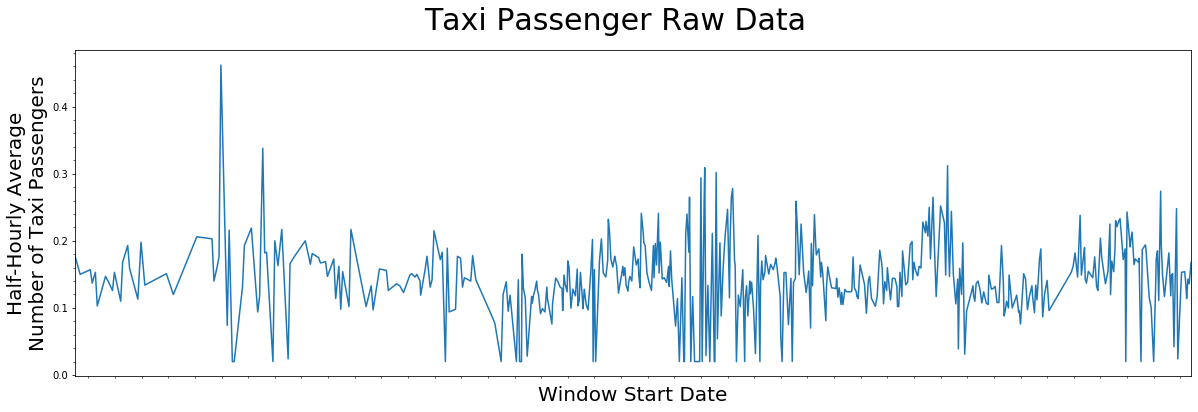

In [57]:
# This code is going to be utilized to control the axis labeling of the plots
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick

x_axis_labels = p1_[(p1_.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]
x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER

plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(p1_['value'])

plt.xticks(np.arange(0, p1_['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.show()

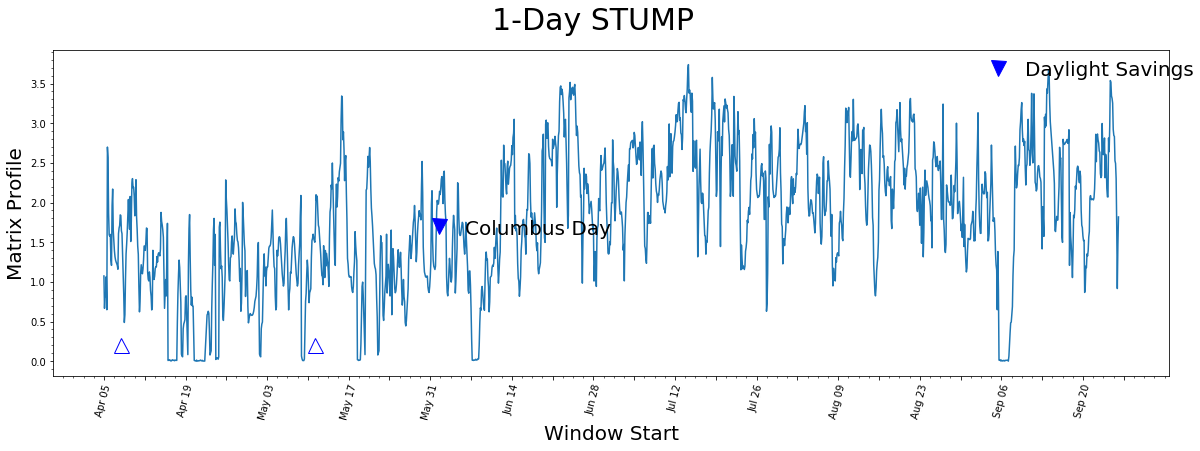

In [58]:
m_rain = 48
mp_rain = stumpy.stump(p1_['value'], m=m)


plt.suptitle('1-Day STUMP', fontsize='30')
plt.xlabel('Window Start', fontsize ='20')
plt.ylabel('Matrix Profile', fontsize='20')
plt.plot(mp_rain[:, 0])

plt.plot(575, 1.7, marker="v", markersize=15, color='b')
plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
plt.plot(30, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.plot(363, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.xticks(np.arange(0, 1800, (m*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

## plot dry periods as markers or rectangle

In [59]:
days_dict ={
  "3-Day": 3,
  "5-Days": 5,
  "7-Days": 7,
  "9-Days": 9,
  "10-Days": 10,
  "11-Days": 11,
    "12-Days": 12,
    "13-Days": 13,
    "14-Days": 14,
    "15-Days": 15,
    "16-Days": 16,
    "17-Days": 17
}

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])

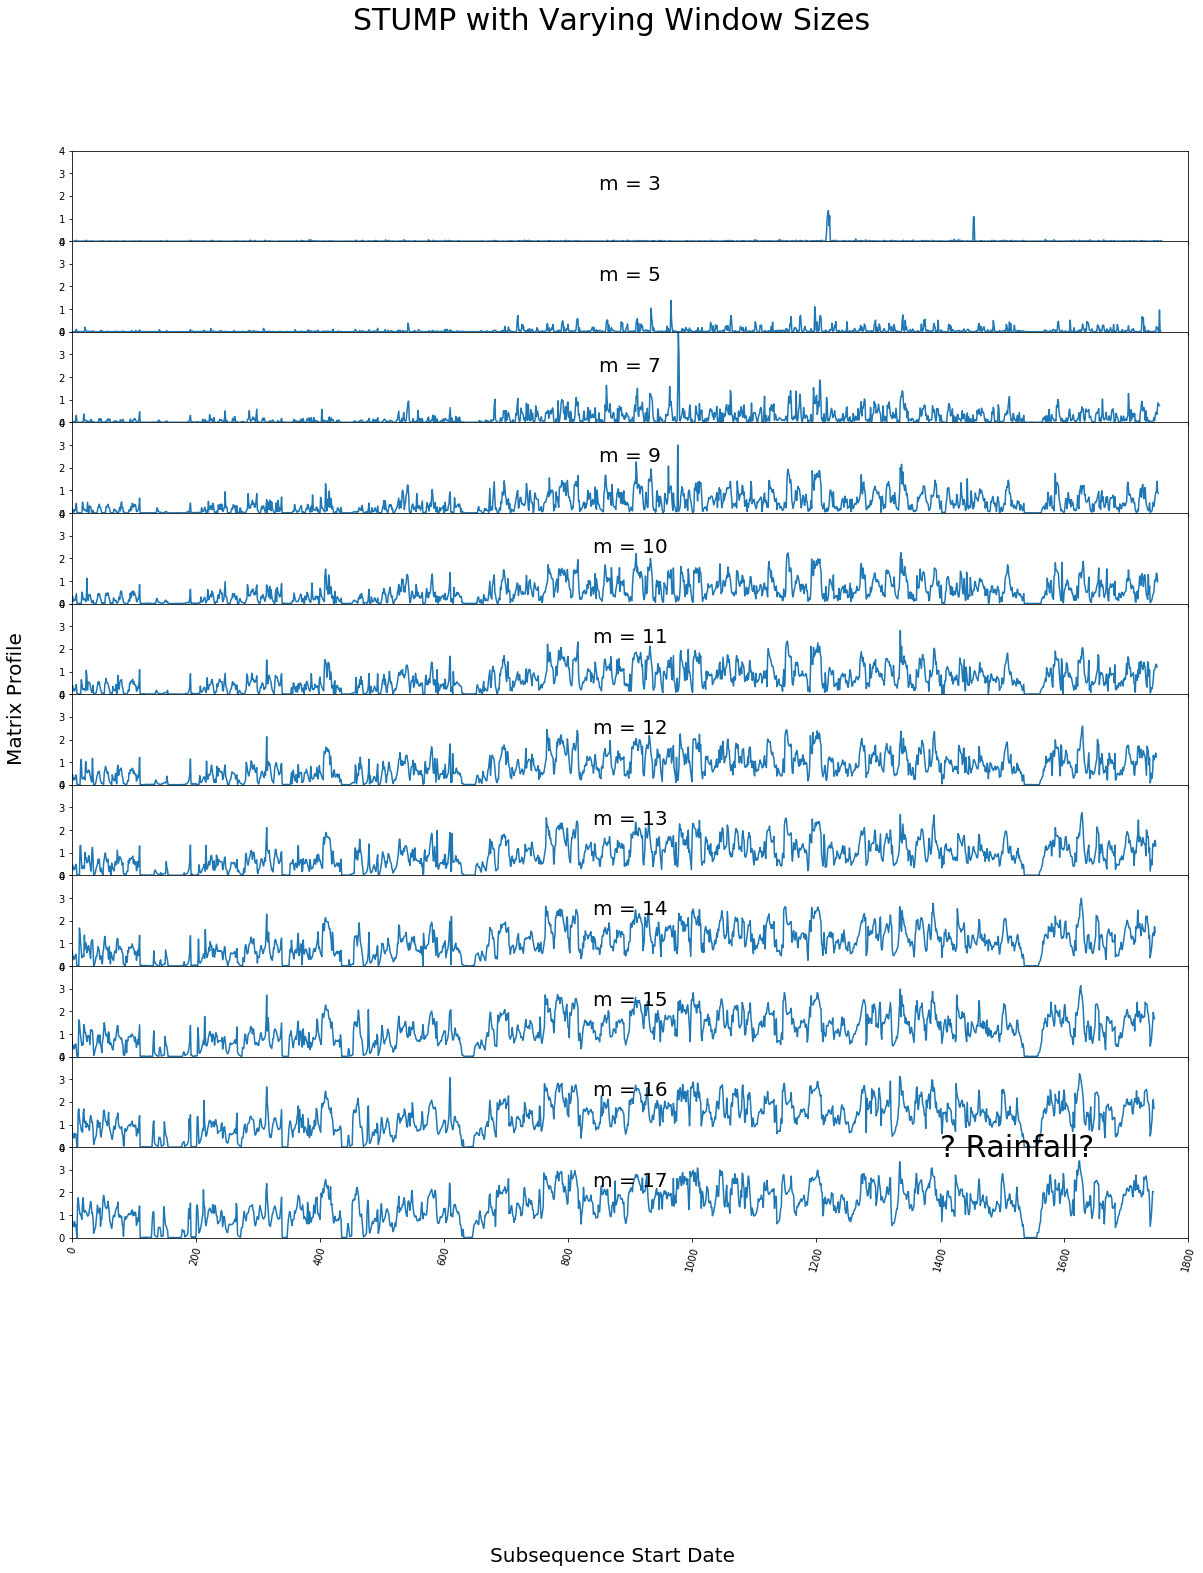

In [60]:
fig, axs = plt.subplots(12, sharex=True, gridspec_kw={'hspace': 0}, figsize=(20,20))
fig.text(0.5, -0.1, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
plt.text(1400, 3.6, '? Rainfall?', color="black", fontsize=30)

for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(p1_['value'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,4)
    axs[i].set_xlim(0,1800)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
#plt.xticks(np.arange(0, p1_.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

## Semantic Segmentation

https://github.com/TDAmeritrade/stumpy/blob/master/docs/Tutorial_Semantic_Segmentation.ipynb
segment it into homogeneous regions." In other words, wouldn't it be nice if you could take your long time series data and be able to segment or chop it up into k regions (where k is small) and with the ultimate goal of presenting only k short representative patterns to a human (or machine) annotator in order to produce labels for the entire dataset. These segmented regions are also known as "regimes". Additionally, as an exploratory tool, one might uncover new actionable insights in the data that was previously undiscovered. Fast low-cost unipotent semantic segmentation (FLUSS) is an algorithm that produces something called an "arc curve" which annotates the raw time series with information about the likelihood of a regime change. Fast low-cost online semantic segmentation (FLOSS) is a variation of FLUSS that, according to the original paper, is domain agnostic, offers streaming capabilities with potential for actionable real-time intervention, and is suitable for real world data (i.e., does not assume that every region of the data belongs to a well-defined semantic segment).

In [61]:
r_sample = 1
p2_ = pd.DataFrame(sm_sample_values_resample_6[r_sample], columns=['value']).reset_index(drop=True).reset_index()
p2_

,index,value
0,0,0.26300
1,1,0.24400
2,2,0.22500
3,3,0.20600
4,4,0.18700
...,...,...
289,289,0.29825
290,290,0.27450
291,291,0.25075
292,292,0.22700


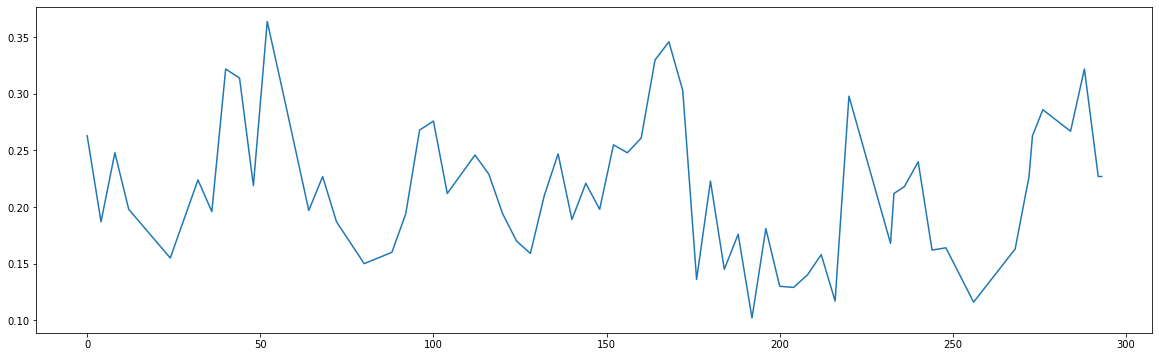

In [62]:
plt.plot(p2_['index'], p2_['value'])
rect = Rectangle((900,0),200,200,facecolor='black')
plt.gca().add_patch(rect)

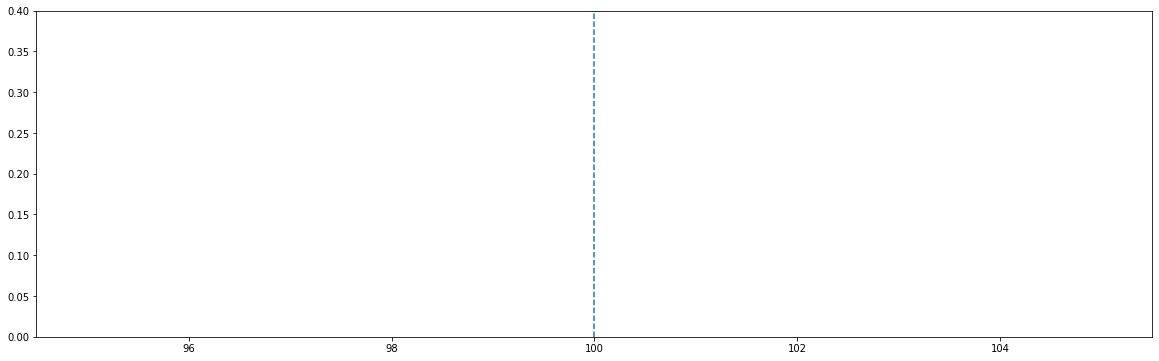

In [63]:
start = 900 - 50
stop = 900 + 50
abp = p2_.iloc[start:stop, 1]
plt.plot(range(abp.shape[0]), abp)
plt.ylim(0, 0.4)
plt.axvline(x=100, linestyle="dashed")

style="Simple, tail_width=0.5, head_width=6, head_length=8"
kw = dict(arrowstyle=style, color="k")

## Shapelet Discovery
https://github.com/TDAmeritrade/stumpy/blob/master/docs/Tutorial_Shapelet_Discovery.ipynb

# Arviz

In [ ]:
az.style.use('arviz-darkgrid')

In [29]:
#create InferenceData
inf_data = az.convert_to_inference_data(xr_model_data)

In [ ]:
az.plot_posterior()

# ELM
Ensemble Learning Models

# TS FRESH

https://tsfresh.readthedocs.io/en/latest/text/faq.html
https://github.com/blue-yonder/tsfresh/blob/master/notebooks/feature_extraction_with_datetime_index.ipynb

In [171]:
from tsfresh.feature_extraction import extract_features
# TimeBasedFCParameters contains all functions that use the Datetime index of the timeseries container
from tsfresh.feature_extraction.settings import TimeBasedFCParameters
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings
import string

### set up data 

In [138]:
#drop values before 2016.01
ts_fresh_samples_6 = [x.loc['2016-01-01' : '2020-01-01'].to_frame() for x in sm_sample_values_resample_6]
#create abc string list for column_id
entities = [x for x in string.ascii_lowercase]
for x,e in zip(ts_fresh_samples_6,entities):
    x['id'] = e
    x.rename(columns={0:'soil_moisture'}, inplace=True)
    x.reset_index(inplace=True)
tf6 = pd.concat(ts_fresh_samples_6)

In [169]:
tf6

,time,soil_moisture,id
0,2016-01-06,0.112500,a
1,2016-01-12,0.103250,a
2,2016-01-18,0.094000,a
3,2016-01-24,0.075500,a
4,2016-01-30,0.057000,a
...,...,...,...
238,2019-12-04,0.323000,t
239,2019-12-10,0.327000,t
240,2019-12-16,0.349667,t
241,2019-12-22,0.372333,t


### extract features

In [129]:
setting_time = TimeBasedFCParameters()
setting_time

{'linear_trend_timewise': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}]}

In [183]:
#extract from stacked dataframe
features_tf6 = extract_features(tf6, column_id='id', column_sort="time", column_kind=None, column_value="soil_moisture", default_fc_parameters=MinimalFCParameters(),
                           impute_function=impute)
features_tf6_max = extract_features(tf6, column_id='id', column_sort="time", column_kind=None, column_value="soil_moisture", impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.18it/s]


In [196]:
#clustering without filtering
from sklearn import cluster
X_tf6_kmeans = [KMeans(n_clusters=x).fit(features_tf6).labels_ for x in range(2,8)]
X_tf6_kmeans_max = [KMeans(n_clusters=x).fit(features_tf6_max).labels_ for x in range(2,8)]
X_kmeans = [KMeans(n_clusters=x).fit([x.set_index('time')['soil_moisture'] for x in ts_fresh_samples_6]).labels_ for x in range(2,8)]



In [224]:
X_kmeans

[array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]),
 array([2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]),
 array([2, 1, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 1]),
 array([4, 0, 0, 2, 1, 4, 3, 4, 3, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 3]),
 array([3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 4, 0, 4, 0, 4, 2, 1, 2, 5, 1]),
 array([5, 0, 6, 0, 0, 5, 2, 5, 2, 0, 1, 3, 1, 3, 1, 6, 2, 6, 4, 2])]

In [233]:
a = pd.DataFrame([X_tf6_kmeans,X_tf6_kmeans_max,X_kmeans])
a.rename({0 : 'X_tf6_kmeans', 1 : 'X_tf6_kmeans_max', 2 : 'X_kmeans',}, axis=0, inplace=True)
a.rename({0 : 'n_cluster_2', 1 : 'n_cluster_3', 2 : 'n_cluster_4', 3 : 'n_cluster_5', 4 : 'n_cluster_6', 5 : 'n_cluster_7',}, axis=1, inplace=True)

,n_cluster_2,n_cluster_3,n_cluster_4,n_cluster_5,n_cluster_6,n_cluster_7
X_tf6_kmeans,"[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, ...","[1, 0, 3, 2, 2, 1, 3, 1, 3, 2, 1, 2, 2, 0, 2, ...","[3, 4, 0, 2, 1, 3, 0, 3, 0, 2, 3, 2, 1, 2, 1, ...","[2, 3, 0, 5, 1, 2, 4, 2, 0, 5, 2, 5, 1, 5, 1, ...","[0, 4, 5, 1, 3, 6, 2, 0, 2, 1, 0, 1, 3, 1, 3, ..."
X_tf6_kmeans_max,"[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, ...","[2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 1, 1, ...","[1, 4, 4, 4, 1, 1, 3, 1, 4, 1, 3, 1, 1, 2, 2, ...","[0, 0, 4, 2, 0, 0, 4, 0, 4, 0, 4, 0, 2, 3, 3, ...","[5, 1, 1, 1, 1, 4, 6, 4, 6, 1, 6, 1, 3, 2, 2, ..."
X_kmeans,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, ...","[2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, ...","[2, 1, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3, 0, 0, ...","[4, 0, 0, 2, 1, 4, 3, 4, 3, 1, 2, 1, 2, 1, 2, ...","[3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 4, 0, 4, 0, 4, ...","[5, 0, 6, 0, 0, 5, 2, 5, 2, 0, 1, 3, 1, 3, 1, ..."


In [ ]:
fig, axs = plt.subplot(nrows=7)
for ax in axs:
    

### Writing your own time-based feature calculators

Writing your own time-based feature calculators is no different from usual. Only two new properties must be set using the @set_property decorator:

1) @set_property("input", "pd.Series") tells the function that the input of the function is a pd.Series rather than a numpy array. This allows the index to be used. 2) @set_property("index_type", pd.DatetimeIndex) tells the function that the input is a DatetimeIndex, allowing it to perform calculations based on time datatypes.

For example, if we want to write a function that calculates the time between the first and last measurement, it could look something like this:

In [ ]:
@set_property("input", "pd.Series")
@set_property("index_type", pd.DatetimeIndex)
def timespan(x, param):
    ix = x.index

    # Get differences between the last timestamp and the first timestamp in seconds, then convert to hours.
    times_seconds = (ix[-1] - ix[0]).total_seconds()
    return times_seconds / float(3600)

## Build a time series container with DAtetime indices

In [ ]:
df = pd.DataFrame({"id": ["a", "a", "a", "a", "b", "b", "b", "b"], 
                   "value": [1, 2, 3, 1, 3, 1, 0, 8],
                   "kind": ["temperature", "temperature", "pressure", "pressure",
                            "temperature", "temperature", "pressure", "pressure"]},
                   index=pd.DatetimeIndex(
                       ['2019-03-01 10:04:00', '2019-03-01 10:50:00', '2019-03-02 00:00:00', '2019-03-02 09:04:59',
                        '2019-03-02 23:54:12', '2019-03-03 08:13:04', '2019-03-04 08:00:00', '2019-03-04 08:01:00']
                   ))
df = df.sort_index()
df

# Biclustering
https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_coclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-coclustering-py

# Clustering 

## Clustering Time Series Features (min, max, mean...)
https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb  
  
https://tslearn.readthedocs.io/en/stable/auto_examples/index.html

## K-shape

In [64]:
X_train_ = X_train.reshape(50,275)
pd.DataFrame(X_train_)


NameError: name 'X_train' is not defined

In [ ]:
# Author: Romain Tavenard
# License: BSD 3 clause
from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:50]
np.random.shuffle(X_train)
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

# kShape clustering
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

## K-Mean

### K-Means Clustering with SK-Learn
only equal length time series possible 

In [65]:
kmeans = KMeans(n_clusters=2)
clustering_sk = [kmeans.fit(x).labels_ for x in to_cluster_sample[1:]]

### K-Means Clustering with TS-Learn

In [66]:
#2 cluster
km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw")
km_dtw_labels = [km_dtw.fit(x).labels_ for x in to_cluster_sample[1:]]
km_soft = TimeSeriesKMeans(n_clusters=2, metric="softdtw")
km_soft_labels = [km_soft.fit(x).labels_ for x in to_cluster_sample[1:]]
km_euc = TimeSeriesKMeans(n_clusters=2, metric="euclidean")
km_euc_labels = [km_euc.fit(x).labels_ for x in to_cluster_sample[1:]]

#3 cluster
km_3_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km_dtw_labels_3 = [km_3_dtw.fit(x).labels_ for x in to_cluster_sample[1:]]
km_3_soft = TimeSeriesKMeans(n_clusters=3, metric="softdtw")
km_soft_labels_3 = [km_3_soft.fit(x).labels_ for x in to_cluster_sample[1:]]
km_3_euc = TimeSeriesKMeans(n_clusters=3, metric="euclidean")
km_euc_labels_3 = [km_3_euc.fit(x).labels_ for x in to_cluster_sample[1:]]

#4 cluster
km_4_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw")
km_dtw_labels_4 = [km_4_dtw.fit(x).labels_ for x in to_cluster_sample[1:]]
km_4_soft = TimeSeriesKMeans(n_clusters=4, metric="softdtw")
km_soft_labels_4 = [km_4_soft.fit(x).labels_ for x in to_cluster_sample[1:]]
km_4_euc = TimeSeriesKMeans(n_clusters=4, metric="euclidean")
km_euc_labels_4 = [km_4_euc.fit(x).labels_ for x in to_cluster_sample[1:]]

#5 cluster
km_5_dtw = TimeSeriesKMeans(n_clusters=5, metric="dtw")
km_dtw_labels_5 = [km_5_dtw.fit(x).labels_ for x in to_cluster_sample[1:]]
km_5_soft = TimeSeriesKMeans(n_clusters=5, metric="softdtw")
km_soft_labels_5 = [km_5_soft.fit(x).labels_ for x in to_cluster_sample[1:]]
km_5_euc = TimeSeriesKMeans(n_clusters=5, metric="euclidean")
km_euc_labels_5 = [km_5_euc.fit(x).labels_ for x in to_cluster_sample[1:]]

#6 cluster
km_6_dtw = TimeSeriesKMeans(n_clusters=6, metric="dtw")
km_dtw_labels_6= [km_6_dtw.fit(x).labels_ for x in to_cluster_sample[1:]]
km_6_soft = TimeSeriesKMeans(n_clusters=6, metric="softdtw")
km_soft_labels_6 = [km_6_soft.fit(x).labels_ for x in to_cluster_sample[1:]]
km_6_euc = TimeSeriesKMeans(n_clusters=6, metric="euclidean")
km_euc_labels_6 = [km_6_euc.fit(x).labels_ for x in to_cluster_sample[1:]]

In [73]:
km_dtw_table

,0,1,2,3,4,5
0,"[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...","[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ..."
1,"[0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, ...","[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, ...","[1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, ...","[1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, ..."
2,"[3, 2, 0, 1, 1, 3, 2, 3, 2, 1, 1, 1, 1, 0, 1, ...","[0, 1, 1, 0, 3, 0, 1, 0, 1, 3, 0, 3, 0, 3, 0, ...","[2, 0, 1, 3, 2, 1, 1, 2, 1, 0, 3, 3, 0, 1, 3, ...","[2, 1, 0, 1, 2, 2, 3, 2, 3, 1, 2, 0, 2, 0, 2, ...","[1, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 3, 1, 1, 3, ...","[0, 1, 1, 2, 0, 2, 2, 0, 3, 0, 3, 1, 1, 2, 1, ..."
3,"[1, 0, 0, 0, 3, 1, 4, 1, 4, 1, 3, 0, 3, 0, 3, ...","[0, 1, 1, 0, 3, 0, 1, 0, 1, 3, 0, 3, 0, 3, 0, ...","[0, 2, 4, 3, 0, 4, 4, 0, 1, 1, 3, 3, 2, 4, 3, ...","[0, 2, 4, 2, 3, 3, 1, 0, 1, 3, 3, 2, 3, 2, 3, ...","[2, 4, 4, 0, 0, 2, 1, 0, 1, 3, 3, 0, 2, 0, 0, ...","[2, 1, 3, 3, 2, 3, 4, 2, 0, 2, 0, 3, 1, 4, 3, ..."
4,"[4, 2, 3, 2, 0, 4, 1, 4, 1, 0, 0, 2, 0, 2, 0, ...","[2, 4, 4, 2, 0, 2, 4, 2, 4, 0, 2, 0, 2, 0, 2, ...","[1, 4, 2, 2, 1, 3, 3, 1, 3, 5, 4, 2, 5, 3, 0, ...","[1, 0, 3, 3, 1, 1, 5, 1, 5, 0, 2, 3, 2, 0, 2, ...","[3, 1, 1, 5, 2, 0, 1, 0, 1, 2, 2, 3, 3, 3, 5, ...","[0, 4, 3, 3, 0, 5, 3, 0, 2, 0, 0, 5, 3, 1, 5, ..."
5,dtw,softdtw,euclidean,None,None,None
6,2,3,4,5,6,None


In [71]:
metric = ['dtw', 'softdtw', 'euclidean']
n_cluster = [2,3,4,5,6]
cols = list(itertools.chain.from_iterable([['p' + str(x) for x in range(1,21)],['metric', 'n_clusters']]))
km_dtw_table = pd.DataFrame([km_dtw_labels, km_dtw_labels_3, km_dtw_labels_4, km_dtw_labels_5, km_dtw_labels_6, metric, n_cluster])
km_softdtw_table = pd.DataFrame([km_soft_labels, km_soft_labels_3, km_soft_labels_4, km_soft_labels_5, km_soft_labels_6,metric, n_cluster])
km_euclidean_table = pd.DataFrame([km_euc_labels, km_euc_labels_3, km_euc_labels_4, km_euc_labels_5, km_euc_labels_6,metric, n_cluster])
pr
ts_labels_km_features = pd.concat([km_dtw_table, km_softdtw_table, km_euclidean_table])
ts_labels_km_features = ts_labels_km_features.pivot(index='n_clusters', columns='metric', values=['p' + str(x) for x in range(1,21)])
ts_labels_km_features

KeyError: 'n_clusters'

In [ ]:
clustering_ts = [km.fit(x).labels_ for x in to_cluster_sample[1:]]

# Compare & Visualize Results

In [ ]:
results_sk = pd.DataFrame(clustering_sk, columns=['p' + str(x) for x in range(1,21)], index = ['season_mean', 'monthly_mean', 'season_min','monthly_min', 'season_max', 'monthly_max'])
results_ts = pd.DataFrame(clustering_ts, columns=['p' + str(x) for x in range(1,21)], index = ['season_mean', 'monthly_mean', 'season_min','monthly_min', 'season_max', 'monthly_max'])

pd.concat([results_sk,results_ts])

In [ ]:
results_sk == results_ts

In [ ]:
#sk
fig, axs = plt.subplots(2, 3, dpi=300)
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

[ax1.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_mean,results_sk.loc['season_mean'])]
[ax2.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_min,results_sk.loc['season_min'])]
[ax3.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_max,results_sk.loc['season_max'])]

[ax4.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_mean,results_sk.loc['monthly_mean'])]
[ax5.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_min,results_sk.loc['monthly_min'])]
[ax6.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_max,results_sk.loc['monthly_max'])]

#set x-ticks
ax4, ax5, ax6 = [x.set_xticks([2,4,6,8,10,12]) for x in axs[1]]

columns = ['mean', 'min', 'max']
rows = ['season', 'monthly']
for ax,col in zip(axs[0],columns):
    ax.set_title(col)
    
for ax,row in zip(axs[:,0],rows):
    ax.set_ylabel(row)
    
fig.suptitle('SK Learn Clustering \n soil moisture [cm3/cm3]')
plt.tight_layout(True)
fig.subplots_adjust(top=0.83)
;

In [ ]:
#ts
fig, axs = plt.subplots(2, 3, dpi=300)
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

[ax1.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_mean,results_ts.loc['season_mean'])]
[ax2.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_min,results_ts.loc['season_min'])]
[ax3.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_season_max,results_ts.loc['season_max'])]

[ax4.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_mean,results_ts.loc['monthly_mean'])]
[ax5.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_min,results_ts.loc['monthly_min'])]
[ax6.plot(line, color='C'+str(c), linewidth=0.5) for line,c in zip(sm_sample_monthly_max,results_ts.loc['monthly_max'])]

#set x-ticks
ax4, ax5, ax6 = [x.set_xticks([2,4,6,8,10,12]) for x in axs[1]]

columns = ['mean', 'min', 'max']
rows = ['season', 'monthly']
for ax,col in zip(axs[0],columns):
    ax.set_title(col)
    
for ax,row in zip(axs[:,0],rows):
    ax.set_ylabel(row)
    
fig.suptitle('TS Learn Clustering with DTW \n soil moisture [cm3/cm3]')
plt.tight_layout(True)
fig.subplots_adjust(top=0.83)
;

# Clustering Resampled Daily Time Series 
https://tslearn.readthedocs.io/en/latest/variablelength.html#classification

## Global Alignment Kernel K-means.


In [ ]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
gak_km = GlobalAlignmentKernelKMeans(n_clusters=2)
labels_gak = gak_km.fit_predict(sm_sample_values_resample)

In [ ]:
gak_km_3 = GlobalAlignmentKernelKMeans(n_clusters=3)
labels_gak_3 = gak_km_3.fit_predict(sm_sample_values_resample)

In [ ]:
gak_km_4 = GlobalAlignmentKernelKMeans(n_clusters=4)
labels_gak_4 = gak_km_4.fit_predict(sm_sample_values_resample)

In [ ]:
gak_km_5 = GlobalAlignmentKernelKMeans(n_clusters=5)
labels_gak_5 = gak_km_5.fit_predict(sm_sample_values_resample)

In [ ]:
gak_km_6 = GlobalAlignmentKernelKMeans(n_clusters=6)
labels_gak_6 = gak_km_6.fit_predict(sm_sample_values_resample)

In [ ]:
gak_km_7 = GlobalAlignmentKernelKMeans(n_clusters=7)
labels_gak_7 = gak_km_7.fit_predict(sm_sample_values_resample)

In [ ]:
n_clusters = [2,3,4,5,6,7]
samples = ['p' + str(x) for x in range(1,21)]
labels_gak_table = pd.DataFrame([labels_gak, labels_gak_3, labels_gak_4, labels_gak_5, labels_gak_6, labels_gak_7])
labels_gak

## K-means clustering for time-series data.

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels_dtw = km_dtw.fit_predict(sm_sample_values_resample)
km_bis = TimeSeriesKMeans(n_clusters=2, metric="softdtw")
labels_bis = km_bis.fit_predict(sm_sample_values_resample)
km_euc = TimeSeriesKMeans(n_clusters=2, metric="euclidean")
labels_euc = km_euc.fit_predict(sm_sample_values_resample)

In [ ]:
km_dtw_3 = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels_dtw_3 = km_dtw_3.fit_predict(sm_sample_values_resample)
km_bis_3 = TimeSeriesKMeans(n_clusters=3, metric="softdtw")
labels_bis_3 = km_bis_3.fit_predict(sm_sample_values_resample)
km_euc_3 = TimeSeriesKMeans(n_clusters=3, metric="euclidean")
labels_euc_3 = km_euc_3.fit_predict(sm_sample_values_resample)

In [ ]:
km_dtw_4 = TimeSeriesKMeans(n_clusters=4, metric="dtw")
labels_dtw_4 = km_dtw_4.fit_predict(sm_sample_values_resample)
km_bis_4 = TimeSeriesKMeans(n_clusters=4, metric="softdtw")
labels_bis_4 = km_bis_4.fit_predict(sm_sample_values_resample)
km_euc_4 = TimeSeriesKMeans(n_clusters=4, metric="euclidean")
labels_euc_4 = km_euc_4.fit_predict(sm_sample_values_resample)

In [ ]:
km_dtw_5 = TimeSeriesKMeans(n_clusters=5, metric="dtw")
labels_dtw_5 = km_dtw_5.fit_predict(sm_sample_values_resample)
km_bis_5 = TimeSeriesKMeans(n_clusters=5, metric="softdtw")
labels_bis_5 = km_bis_5.fit_predict(sm_sample_values_resample)
km_euc_5 = TimeSeriesKMeans(n_clusters=5, metric="euclidean")
labels_euc_5 = km_euc_5.fit_predict(sm_sample_values_resample)

In [ ]:
km_dtw_6 = TimeSeriesKMeans(n_clusters=6, metric="dtw")
labels_dtw_6 = km_dtw_6.fit_predict(sm_sample_values_resample)
km_bis_6 = TimeSeriesKMeans(n_clusters=6, metric="softdtw")
labels_bis_6 = km_bis_6.fit_predict(sm_sample_values_resample)
km_euc_6 = TimeSeriesKMeans(n_clusters=6, metric="euclidean")
labels_euc_6 = km_euc_6.fit_predict(sm_sample_values_resample)

In [ ]:
km_dtw_7 = TimeSeriesKMeans(n_clusters=7, metric="dtw")
labels_dtw_7 = km_dtw_7.fit_predict(sm_sample_values_resample)
km_bis_7 = TimeSeriesKMeans(n_clusters=7, metric="softdtw")
labels_bis_7 = km_bis_7.fit_predict(sm_sample_values_resample)
km_euc_7 = TimeSeriesKMeans(n_clusters=7, metric="euclidean")
labels_euc_7 = km_euc_7.fit_predict(sm_sample_values_resample)

In [ ]:
#summary in a pivot table and save as tex table
labels_kmean_samples = pd.DataFrame([labels_dtw, labels_bis, labels_euc, labels_dtw_3, labels_bis_3, labels_euc_3, labels_dtw_4, labels_bis_4, labels_euc_4, labels_dtw_5, labels_bis_5, labels_euc_5, labels_dtw_6, labels_bis_6, labels_euc_6,  labels_dtw_7, labels_bis_7, labels_euc_7], columns=['p' + str(x) for x in range(1,21)])
labels_kmean_samples['metric'] = ["dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean"]
labels_kmean_samples['n_cluster'] = [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]

labels_kmean_samples_table = labels_kmean_samples.pivot(index='metric', columns='n_cluster', values=['p' + str(x) for x in range(1,21)])

table1_kmeans_timeseries_interp_summary = labels_kmean_samples_table.to_latex(buf=paths[4] + 'table1_kmeans_timeseries_interp_summary.tex')
labels_kmean_samples_table

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20,12), sharex=True, sharey=True)
fig.suptitle('K-Mean samples (20) cluster for different n_clusters', fontsize=16)# Set the ticks and ticklabels for all axes
fig.subplots_adjust(top=0.94)
plt.setp(axs, xticks=[2,3,4,5,6,7], yticks=[0, 1, 2, 3, 4, 5, 6])
for ax,n in zip(axs, [1,5,9,13,17]):
    for ax,p in zip(ax,['p' + str(x) for x in range(n,21)]):
        labels_kmean_samples_table[p].plot(ax=ax, legend=False, grid=True, ls='-', linewidth=0.5, marker='o')
        ax.set(title=p, ylabel='cluster')
        #ax.xtick(labelsize=6)
        


# Silhouette (clustering) 
https://en.wikipedia.org/wiki/Silhouette_(clustering)  
−1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. 

In [ ]:
#mean Silhouette Coefficient of all samples
from tslearn.clustering import silhouette_score
s_dtw = silhouette_score(sm_sample_values_resample, labels_dtw, metric="dtw")
s_softdtw = silhouette_score(sm_sample_values_resample, labels_bis, metric="softdtw")

In [ ]:
s_euclidean = silhouette_score(sm_sample_values_resample, labels_euc, metric="euclidean")

In [ ]:
s_dtw_3 = silhouette_score(sm_sample_values_resample, labels_dtw_3, metric="dtw")
s_softdtw_3 = silhouette_score(sm_sample_values_resample, labels_bis_3, metric="softdtw")

In [ ]:
s_euclidean_3 = silhouette_score(sm_sample_values_resample, labels_euc_3, metric="euclidean")

In [ ]:
s_dtw_4 = silhouette_score(sm_sample_values_resample, labels_dtw_4, metric="dtw")
s_softdtw_4 = silhouette_score(sm_sample_values_resample, labels_bis_4, metric="softdtw")

In [ ]:
s_euclidean_4 = silhouette_score(sm_sample_values_resample, labels_euc_4, metric="euclidean")

In [ ]:
s_dtw_5 = silhouette_score(sm_sample_values_resample, labels_dtw_5, metric="dtw")
s_softdtw_5 = silhouette_score(sm_sample_values_resample, labels_bis_5, metric="softdtw")

In [ ]:
s_euclidean_5 = silhouette_score(sm_sample_values_resample, labels_euc_5, metric="euclidean")

In [ ]:
s_dtw_6 = silhouette_score(sm_sample_values_resample, labels_dtw_6, metric="dtw")
s_softdtw_6 = silhouette_score(sm_sample_values_resample, labels_bis_6, metric="softdtw")

In [ ]:
s_euclidean_6 = silhouette_score(sm_sample_values_resample, labels_euc_6, metric="euclidea")

In [ ]:
s_dtw_7 = silhouette_score(sm_sample_values_resample, labels_dtw_7, metric="dtw")
s_softdtw_7 = silhouette_score(sm_sample_values_resample, labels_bis_7, metric="softdtw")

In [ ]:
s_euclidean_7 = silhouette_score(sm_sample_values_resample, labels_euc_7, metric="euclidea")

In [ ]:
silhouette_score = pd.DataFrame({'silhouette_score' : [s_dtw, s_softdtw,  s_dtw_3, s_softdtw_3 , s_dtw_4, s_softdtw_4,  s_dtw_5, s_softdtw_5, s_dtw_6, s_softdtw_6, s_dtw_7, s_softdtw_7],'metric' : ['dtw','softdtw','dtw','softdtw','dtw','softdtw','dtw','softdtw','dtw','softdtw','dtw','softdtw'], 'n_clusters' : [2,2,3,3,4,4,5,5,6,6,7,7]})
silhouette_score_table = silhouette_score.pivot(index='n_clusters', columns='metric', values='silhouette_score')
silhouette_score_table.plot(title='silhouette_score');

## TimeSeriesScalerMinMax

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
sm_sample_values_resample_scaled = TimeSeriesScalerMinMax().fit_transform(sm_sample_values_resample)

In [ ]:
scaled_km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw")
scaled_labels_dtw = scaled_km_dtw.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis = TimeSeriesKMeans(n_clusters=2, metric="softdtw")
scaled_labels_bis = scaled_km_bis.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc = TimeSeriesKMeans(n_clusters=2, metric="euclidean")
scaled_labels_euc = scaled_km_euc.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
scaled_km_dtw_3 = TimeSeriesKMeans(n_clusters=3, metric="dtw")
scaled_labels_dtw_3 = scaled_km_dtw_3.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis_3 = TimeSeriesKMeans(n_clusters=3, metric="softdtw")
scaled_labels_bis_3 = scaled_km_bis_3.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc_3 = TimeSeriesKMeans(n_clusters=3, metric="euclidean")
scaled_labels_euc_3 = scaled_km_euc_3.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
scaled_km_dtw_4 = TimeSeriesKMeans(n_clusters=4, metric="dtw")
scaled_labels_dtw_4 = scaled_km_dtw_4.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis_4 = TimeSeriesKMeans(n_clusters=4, metric="softdtw")
scaled_labels_bis_4 = scaled_km_bis_4.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc_4 = TimeSeriesKMeans(n_clusters=4, metric="euclidean")
scaled_labels_euc_4 = scaled_km_euc_4.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
scaled_km_dtw_5 = TimeSeriesKMeans(n_clusters=5, metric="dtw")
scaled_labels_dtw_5 = scaled_km_dtw_5.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis_5 = TimeSeriesKMeans(n_clusters=5, metric="softdtw")
scaled_labels_bis_5 = scaled_km_bis_5.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc_5 = TimeSeriesKMeans(n_clusters=5, metric="euclidean")
scaled_labels_euc_5 = scaled_km_euc_5.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
scaled_km_dtw_6 = TimeSeriesKMeans(n_clusters=6, metric="dtw")
scaled_labels_dtw_6 = scaled_km_dtw_6.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis_6 = TimeSeriesKMeans(n_clusters=6, metric="softdtw")
scaled_labels_bis_6 = scaled_km_bis_6.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc_6 = TimeSeriesKMeans(n_clusters=6, metric="euclidean")
scaled_labels_euc_6 = scaled_km_euc_6.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
scaled_km_dtw_7 = TimeSeriesKMeans(n_clusters=7, metric="dtw")
scaled_labels_dtw_7 = scaled_km_dtw_7.fit_predict(sm_sample_values_resample_scaled)
scaled_km_bis_7 = TimeSeriesKMeans(n_clusters=7, metric="softdtw")
scaled_labels_bis_7 = scaled_km_bis_7.fit_predict(sm_sample_values_resample_scaled)
scaled_km_euc = TimeSeriesKMeans(n_clusters=7, metric="euclidean")
scaled_labels_euc_7 = scaled_km_euc_7.fit_predict(sm_sample_values_resample_scaled)

In [ ]:
metrics = ["dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean","dtw", "softdtw", "euclidean"]
ncluster = [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]
labels_minmax_kmeans_samples = pd.DataFrame([scaled_labels_dtw, scaled_labels_bis, scaled_labels_euc, scaled_labels_dtw_3, scaled_labels_bis_3, scaled_labels_euc_3, scaled_labels_dtw_4, scaled_labels_bis_4, scaled_labels_euc_4, scaled_labels_dtw_5, scaled_labels_bis_5, scaled_labels_euc_5, scaled_labels_dtw_6, scaled_labels_bis_6, scaled_labels_euc_6,  scaled_labels_dtw_7, scaled_labels_bis_7, scaled_labels_euc_7, metrics, ncluster], columns=list(itertools.chain.from_iterable([['p' + str(x) for x in range(1,21)],['metric', 'n_clusters']])))
labels_minmax_kmeans_samples_table = labels_minmax_kmeans_samples.pivot(index='n_clusters', columns='metric', values=['p' + str(x) for x in range(1,21)])


# Histogram

In [ ]:
sm_sample_values_resample_1_6[0]

In [ ]:
[plt.plot(kind='hist',data=x[0]) for x in sm_sample_values_resample_1_6]

# Create Classification Map

In [ ]:
ried_cfm = [[z[0][1],z[0][0],z[1]] for z in zip(list_ried_center,kmeans.labels_)]

df_ried = pd.DataFrame(ried_cfm, columns=['longitude', 'latitude', 'cf'])

gdf_ried = gpd.GeoDataFrame(df_ried, geometry=gpd.points_from_xy(df_ried.longitude, df_ried.latitude))

gdf_ried.to_file("clfm/ried_cfm_29_04.shp")

# colors

In [4]:
import matplotlib.colors as mcolors
expand_tablue = list(mcolors.TABLEAU_COLORS.keys()) + ['tab:purple']
n = np.array([expand_tablue, expand_tablue, expand_tablue], ndmin=2)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color'];

# Functions

In [3]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['xtick.direction'] = 'out'

change_plot_size(20, 6, plt)

# Modules

In [75]:
import geopandas as gpd
import pandas as pd
import xarray as xr
import arviz as az
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib import animation
from IPython.display import HTML
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import pprint as pp
import itertools
from itertools import islice 
import stumpy
import sys
import datetime as dt
import urllib
import ssl
import io
import os
from IPython.core.display import display, HTML

In [ ]:
#!conda install -c conda-forge --yes --prefix {sys.prefix} stumpy


In [ ]:
!conda install -c conda-forge --yes --prefix {sys.prefix} jupyter_contrib_nbextensions

In [ ]:
!jupyter nbextensions_configurator enable --sys-prefix

In [ ]:
!jupyter nb_xxx_extension enable --sys-prefix

In [ ]:
!jupyter nbextension enable toc2

# Paths

In [2]:
#paths 
paths = ['C://Users//USER//Desktop//master-thesis-master//', 'D://jupy_data//', 'C://Users//USER//Desktop//Masterarbeit//DATA//master_data//', 'C:\\Users\\USER\\Desktop\\Masterarbeit\\DATA\\master_data\\', 'C://Users//USER//Desktop//master-thesis-master//tables//', 'C://Users//USER//Desktop//master-thesis-master//images//'] 